In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [9]:
df = df.iloc[:,1:] #means all rows and columns from 1 onwards not 0th one is needed

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [12]:
import matplotlib.pyplot as plt

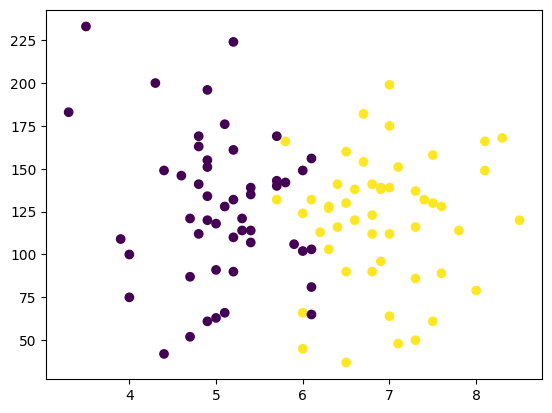

In [14]:
plt.scatter(df['cgpa'] , df['iq'], c = df['placement'])

In [17]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y


,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.1)

In [22]:
x_train

,cgpa,iq
47,5.2,161.0
15,5.1,176.0
0,6.8,123.0
18,4.0,100.0
3,7.4,132.0
...,...,...
19,5.2,132.0
5,7.1,48.0
55,7.8,114.0
97,6.7,182.0


In [23]:
y_train

,placement
47,0
15,0
0,1
18,0
3,1
...,...
19,0
5,1
55,1
97,1


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.68333552,  0.96740362],
       [-0.77106761,  1.3430133 ],
       [ 0.72037796,  0.01585908],
       [-1.73612062, -0.56007578],
       [ 1.24677051,  0.24122489],
       [ 0.2817175 , -0.48495384],
       [ 0.2817175 ,  0.1410623 ],
       [ 0.89584214,  0.41650941],
       [ 0.72037796, -0.81048224],
       [ 0.54491377,  0.39146876],
       [ 0.01852122, -1.9373113 ],
       [ 1.15903842, -0.15942544],
       [-1.38519226, -2.01243323],
       [ 0.54491377, -0.05926286],
       [ 1.86089516,  0.66691587],
       [ 0.89584214,  1.91894816],
       [ 0.89584214,  1.31797266],
       [-2.17478108,  2.77033011],
       [-1.12199598, -0.88560417],
       [-1.03426389,  0.4665907 ],
       [ 1.3345026 ,  0.1911436 ],
       [-1.03426389,  1.01748491],
       [-0.94653179, -0.05926286],
       [-0.68333552, -0.81048224],
       [ 0.45718168,  0.1911436 ],
       [ 1.15903842,  0.36642812],
       [ 0.10625331, -0.48495384],
       [-0.8587997 , -0.78544159],
       [ 0.10625331,

In [27]:
x_test = scaler.transform(x_test)
x_test

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[  8.3, 168. ],
       [  7.6,  89. ],
       [  4.8, 112. ],
       [  5.2, 224. ],
       [  5.7, 140. ],
       [  5.2, 110. ],
       [  6.1, 132. ],
       [  5. , 118. ],
       [  6.9, 139. ],
       [  6.2, 113. ]])

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()   #MODEL TRAINING
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(x_test)

In [30]:
y_test

,placement
53,1
42,1
59,0
16,0
36,0
92,0
71,1
67,0
60,1
99,1


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5

<Axes: >

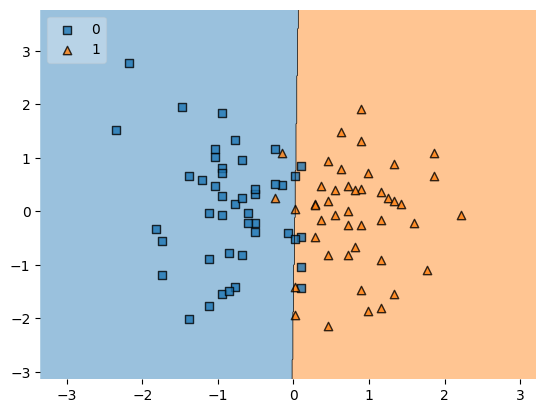

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [36]:
import pickle

In [38]:
pickle.dump(clf,open('model.pkl','wb'))